# Insight Data Science - Scraped Fellow Data

In Anaconda prompt, enter 'pip install lxml' and 'pip install requests'

In [1]:
from lxml import html
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import math
from itertools import groupby
import collections

## Insight Health Data Science Fellows

### This program currently operates on site in either Boston, MA or Seattle, WA (no Remote option)

In [2]:
# Scrape data from webpage
page = requests.get('http://insighthealthdata.com/fellows')
tree = html.fromstring(page.content)

Which companies have hired the most Health fellows?

In [3]:
#Extract a list of names:
health_name = tree.xpath('//div[@class="fellow_name"]/text()')
#Extract a list of companies:
health_company = tree.xpath('//div[@class="fellow_company"]/text()')
#Extract job title:
health_title = tree.xpath('//div[@class="toottip_title"]/text()')
#Extract academic background: 
health_bckgrd = tree.xpath('//div[@class="tooltip_background"]/text()')
#Extract project description:
health_project = tree.xpath('//div[@class="tooltip_project"]/text()')

In [4]:
#Combine fields into data frame
health_fellows = pd.DataFrame(data=[health_company, health_title, health_bckgrd, health_project]).transpose()

In [5]:
#Rename columns
health_fellows.columns=['Company','Title','Background','Project']

In [6]:
#How many fellows in this data set?
num = len(health_fellows)
print("There are %d fellows in this dataset" %num)

There are 91 fellows in this dataset


In [7]:
#Check first five rows of data
health_fellows[:5]

,Company,Title,Background,Project
0,Seven Bridges,Scientific Product Manager,"Neuroscience, Johns Hopkins University, PhD",Just-go-ah: Detecting Parkinson's disease from...
1,The Broad Institute,Computational Biologist,"Cell Biology, Harvard, Postdoc",OncoPredictor: Predicting patient response to ...
2,Foundation Medicine,Bioinformatician,"Computational Biology, University of Texas Sou...",Survive Sepsis: Discover the biomarkers of sep...
3,Dana Farber Cancer Institute,Bioinformatician,"Bioinformatics, University of Massachusetts Me...",PAINS Train: Identifying false positive result...
4,Seven Bridges,R&D Scientist,"Sleep & Cardiovascular Medicine, Brigham & Wom...",Forum Post Assistant: Increasing Adherence thr...


Need to split the Background field into separate components (field, institution, degree)

In [8]:
hf = health_fellows.join(health_fellows['Background'].str.split(',', expand=True).rename(columns={0:'Field', 1:'Institution',2:'Degree'}))

In [9]:
#Check first five rows
hf[:5]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
0,Seven Bridges,Scientific Product Manager,"Neuroscience, Johns Hopkins University, PhD",Just-go-ah: Detecting Parkinson's disease from...,Neuroscience,Johns Hopkins University,PhD,None,None
1,The Broad Institute,Computational Biologist,"Cell Biology, Harvard, Postdoc",OncoPredictor: Predicting patient response to ...,Cell Biology,Harvard,Postdoc,None,None
2,Foundation Medicine,Bioinformatician,"Computational Biology, University of Texas Sou...",Survive Sepsis: Discover the biomarkers of sep...,Computational Biology,University of Texas Southwestern Medical Cent...,PhD,None,None
3,Dana Farber Cancer Institute,Bioinformatician,"Bioinformatics, University of Massachusetts Me...",PAINS Train: Identifying false positive result...,Bioinformatics,University of Massachusetts Medical School,PhD,None,None
4,Seven Bridges,R&D Scientist,"Sleep & Cardiovascular Medicine, Brigham & Wom...",Forum Post Assistant: Increasing Adherence thr...,Sleep & Cardiovascular Medicine,Brigham & Women's Hospital & Harvard Medical ...,Research Fellow,None,None


In [10]:
#Check summary info for all variables
hf.describe()

,Company,Title,Background,Project,Field,Institution,Degree,3,4
count,89,90,91,91,91,87,84,6,1
unique,63,38,89,91,58,64,17,6,1
top,Seven Bridges,Data Scientist,"Physics, Harvard University, PhD",OpenPharma: Transparency in Drug Development,Physics,Cornell University,PhD,University of Texas at Austin,PhD
freq,9,29,2,1,10,6,33,1,1


Need to address the last two columns. There were multiple commas in the Background variable that caused this shift.

In [11]:
#Examine column "3" values
collections.Counter(hf[3])

Counter({None: 85,
         '\xa0PhD': 1,
         ' PhD': 1,
         ' University of Texas at Austin': 1,
         ' Principal Investigator ': 1,
         ' Postdoc ': 1,
         ' PhD ': 1})

In [12]:
# Find rows where data shifted into column 3
hf.loc[hf[3].isin(['\xa0PhD',' PhD',' University of Texas at Austin',' Principal Investigator ',' Postdoc ',' PhD '])]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
28,TempAltert,Analyst II - Neuroinformatics,"Mathematics, University of Minnesota, Twin Cit...",Limelight: Optimizing bioprocessing experiments,Mathematics,University of Minnesota,Twin Cities,PhD,None
35,Insight Data Science,Marketing Data Scientist,"Statistical Genetics, University of Cambridge,...",Genomix: Mixing genomic data for an Alzheimer'...,Statistical Genetics,University of Cambridge,Sanger Institute,PhD,None
54,Accenture,"Associate Director, Data Scientist","Ecology, Evolution, and Behavior, University o...",The Lyme Forecast: Predicting the spread of Ly...,Ecology,Evolution,and Behavior,University of Texas at Austin,PhD
61,Apple,Computational Biologist & Data Scientist,"Theoretical Physics & Population Biology, Univ...",HealthConnect.Online: Automating online inform...,Theoretical Physics & Population Biology,University California,Davis,Principal Investigator,None
72,Roche Sequencing Solutions,Data Scientist,"Biochemistry, University of California, Berkel...",PleaseInsure: Helping health insurance profess...,Biochemistry,University of California,Berkeley,Postdoc,None
88,City of Boston,Data Scientist,"Population Genomics, University of Massachuset...",Trust your gut: Predict colorectal cancer risk...,Population Genomics,University of Massachusetts,Amherst,PhD,None


In [13]:
# Manually recode six rows of data
hf.at[26, 'Institution'] = 'University of Minnesota, Twin Cities'
hf.at[26, 'Degree'] = 'PhD'
hf.at[36, 'Institution'] = 'University of Cambridge, Sanger Institute'
hf.at[36, 'Degree'] = 'PhD'
hf.at[53, 'Field'] = 'Ecology, Evoluation, and Behavior'
hf.at[53, 'Institution'] = 'University of Texas at Austin'
hf.at[53, 'Degree'] = 'PhD'
hf.at[59, 'Institution'] = 'University of California, Davis'
hf.at[59, 'Degree'] = 'Postdoc'
hf.at[69, 'Institution'] = 'University of California, Berkeley'
hf.at[69, 'Degree'] = 'Postdoc'
hf.at[90, 'Institution'] = 'University of Massachusetts, Amherst'
hf.at[90, 'Degree'] = 'PhD'

In [14]:
hf.Degree = hf['Degree'].str.strip()

In [15]:
collections.Counter(hf.Degree)

Counter({'PhD': 40,
         'Postdoc': 33,
         'Research Fellow': 1,
         'Twin Cities': 1,
         None: 6,
         'Research Engineer': 1,
         'Sanger Institute': 1,
         'and Behavior': 1,
         'Clinical Assistant Professor': 1,
         'Research Associate': 1,
         'Davis': 1,
         'Livermore': 1,
         'Berkeley': 2,
         'Amherst': 1})

In [16]:
# Find rows where Degree = None
hf.loc[hf.Degree.isnull()]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
30,Sqrll,Data Scientist,Theoretical Astrophysics Swinburne University ...,MediTweeter: Discovering medical professionals...,Theoretical Astrophysics Swinburne University ...,PhD,None,None,None
64,Driver Group,"Program Director, Data Science",PhD in Epidemiology and Public Health at UCLA ...,"""www.no-squitoes.com,"" A general malaria anoma...",PhD in Epidemiology and Public Health at UCLA ...,None,None,None,None
65,Color Genomics,Computational Biologist,PhD in Molecular and Cell Biology from UC Berk...,Developed novel strategy to cluster flow cytom...,PhD in Molecular and Cell Biology from UC Berk...,None,None,None,None
66,Ancestry,Data Scientist,PhD in Physics with a concentration in bioinfo...,"""eigendoctor.com,"" an app to help patients cho...",PhD in Physics with a concentration in bioinfo...,Santa Barbara.,None,None,None
67,Grand Rounds,Computational Biologist,PhD in Biophysics from University of Chicago,"""Sexpertise"" Content ranking strategy to provi...",PhD in Biophysics from University of Chicago,None,None,None,None
68,Twist,Data Scientist,PhD in Genomics and Molecular Biology from UC ...,"SkinClarity, a web app to provide acne medicat...",PhD in Genomics and Molecular Biology from UC ...,None,None,None,None


In [17]:
# Get full value of problem cells
#hf.at[29, 'Field']
#hf.at[64, 'Field']
#hf.at[66, 'Field']
hf.at[68, 'Field']

'PhD in Genomics and Molecular Biology from UC Berkeley.'

In [18]:
# Manually recode seven additional rows of data (index 29, 64, 65, 66, 67, 68, 70)
hf.at[29, 'Field'] = 'Theoretical Astrophysics'
hf.at[29, 'Institution'] = 'Swinburne University of Technology'
hf.at[29, 'Degree'] = 'PhD'

hf.at[64, 'Field'] = 'Genomics and Molecular Biology'
hf.at[64, 'Institution'] = 'UC Berkeley'
hf.at[64, 'Degree'] = 'PhD'

hf.at[65, 'Field'] = 'Biophysics'
hf.at[65, 'Institution'] = 'University of Chicago'
hf.at[65, 'Degree'] = 'PhD'

hf.at[66, 'Field'] = 'Physics'
hf.at[66, 'Institution'] = 'University of California, Santa Barbara'
hf.at[66, 'Degree'] = 'PhD'

hf.at[67, 'Field'] = 'Molecular and Cell Biology'
hf.at[67, 'Institution'] = 'UC Berkeley'
hf.at[67, 'Degree'] = 'PhD'

hf.at[68, 'Field'] = 'Epidemiology and Public Health'
hf.at[68, 'Institution'] = 'UCLA'
hf.at[68, 'Degree'] = 'PhD'

hf.at[70, 'Institution'] = 'University of California Santa Cruz'
hf.at[70, 'Degree'] = 'PhD'

In [19]:
collections.Counter(hf.Degree)

Counter({'PhD': 46,
         'Postdoc': 32,
         'Research Fellow': 1,
         'Twin Cities': 1,
         None: 1,
         'Research Engineer': 1,
         'Sanger Institute': 1,
         'and Behavior': 1,
         'Clinical Assistant Professor': 1,
         'Research Associate': 1,
         'Davis': 1,
         'Livermore': 1,
         'Berkeley': 2,
         'Amherst': 1})

In [20]:
# Find rows where Degree is not PhD or beyond
hf.loc[hf['Degree'].isin(['Berkeley','Livermore'])]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
62,Seven Bridges,Data Scientist,"Postdoctoral Scientist, Genomics & Computation...",iPredictome: Predicting preterm childbirth fro...,Postdoctoral Scientist,Genomics & Computational Biology at Sandia Na...,Livermore,None,None
63,Insight Data Science,Scientific Project Manager,"Post-doctoral Researcher, Computational Neuros...",iSonogram: Image analysis solution for monitor...,Post-doctoral Researcher,Computational Neuroscience at University of C...,Berkeley,None,None
72,Roche Sequencing Solutions,Data Scientist,"Biochemistry, University of California, Berkel...",PleaseInsure: Helping health insurance profess...,Biochemistry,University of California,Berkeley,Postdoc,None


In [21]:
# See full value of Background at these rows
#hf.at[62, 'Background']
hf.at[63, 'Background']

'Post-doctoral Researcher, Computational Neuroscience at University of California, Berkeley'

In [22]:
#Manually recode rows
hf.at[62, 'Field'] = 'Computational Neuroscience'
hf.at[62, 'Institution'] = 'UC Berkeley'
hf.at[62, 'Degree'] = 'Postdoc'

hf.at[63, 'Field'] = 'Genomics and Computational Biology'
hf.at[63, 'Institution'] = 'Sandia National Laboratories, Livermore'
hf.at[63, 'Degree'] = 'Postdoc'

In [23]:
collections.Counter(hf.Degree)

Counter({'PhD': 46,
         'Postdoc': 34,
         'Research Fellow': 1,
         'Twin Cities': 1,
         None: 1,
         'Research Engineer': 1,
         'Sanger Institute': 1,
         'and Behavior': 1,
         'Clinical Assistant Professor': 1,
         'Research Associate': 1,
         'Davis': 1,
         'Berkeley': 1,
         'Amherst': 1})

*I'm surprised at the amount of data cleaning that was required to fix these fields; this was really good practice for data wrangling and pandas functions*

Now let's work with the Institution column

In [24]:
#collections.Counter(hf.Institution)
# Strip white space
hf.Institution = hf['Institution'].str.strip()
collections.Counter(hf.Institution)

Counter({'BAE Systems': 1,
         "Boston Children's Hostpial": 1,
         'Boston College': 1,
         'Boston University': 2,
         "Brigham & Women's Hospital & Harvard Medical School": 1,
         'Brown University': 1,
         'CUNY': 1,
         'Centre National de la Researche Scientifique': 1,
         'Colorado State University': 1,
         'Columbia University': 1,
         'Cornell University': 5,
         'Drexel University': 1,
         'Duke University': 1,
         'Emory University': 1,
         'Evolution': 1,
         'Harvard': 6,
         'Harvard Medical School': 1,
         'Harvard University': 6,
         'Johns Hopkins School of Public Health': 1,
         'Johns Hopkins University': 2,
         'MIT': 4,
         'Massachusetts Institute of Technology': 1,
         'McGill University': 1,
         'New York University': 1,
         'Northwestern': 1,
         'Northwestern University': 1,
         'PhD': 1,
         'Queens University': 1,
         'R

In [25]:
#Recode some institution names
hf['Institution'] = hf['Institution'].replace(['Harvard'], 'Harvard University')
hf['Institution'] = hf['Institution'].replace(['UC Berkley', 'University of California, Berkeley'], 'UC Berkeley')
hf['Institution'] = hf['Institution'].replace(['Northwestern'], 'Northwestern University')
hf['Institution'] = hf['Institution'].replace(['The University of Texas at Austin'], 'University of Texas at Austin')
collections.Counter(hf.Institution)

Counter({'BAE Systems': 1,
         "Boston Children's Hostpial": 1,
         'Boston College': 1,
         'Boston University': 2,
         "Brigham & Women's Hospital & Harvard Medical School": 1,
         'Brown University': 1,
         'CUNY': 1,
         'Centre National de la Researche Scientifique': 1,
         'Colorado State University': 1,
         'Columbia University': 1,
         'Cornell University': 5,
         'Drexel University': 1,
         'Duke University': 1,
         'Emory University': 1,
         'Evolution': 1,
         'Harvard Medical School': 1,
         'Harvard University': 12,
         'Johns Hopkins School of Public Health': 1,
         'Johns Hopkins University': 2,
         'MIT': 4,
         'Massachusetts Institute of Technology': 1,
         'McGill University': 1,
         'New York University': 1,
         'Northwestern University': 2,
         'PhD': 1,
         'Queens University': 1,
         'Rice University': 1,
         'Sandia National Labo

Now, let's look at the Field variable

In [26]:
collections.Counter(hf.Field)

Counter({'Applied Physics': 1,
         'Astrophysics': 2,
         'Biochemistry': 2,
         'Bioengineering': 2,
         'Bioinformatics': 2,
         'Bioinformatics/Genomics': 2,
         'Biological and Biomedical Sciences': 1,
         'Biology': 3,
         'Biomedical Engineering': 2,
         'Biophysics': 4,
         'Brain & Cognitive Sciences': 1,
         'Cell Biology': 1,
         'Cell Biology & Genetics': 1,
         'Cognitive Neuroscience': 3,
         'Computational Biology': 3,
         'Computational Material Sciences': 1,
         'Computational Neuroscience': 1,
         'Computational Polymer Physics': 1,
         'Computer Science': 1,
         'Ecology': 2,
         'Ecology, Evoluation, and Behavior': 1,
         'Electrical and Computer Engineering': 1,
         'Environmental Engineering': 1,
         'Environmental Epidemiology': 1,
         'Environmental Sciences': 1,
         'Epidemiology': 1,
         'Epidemiology and Public Health': 1,
         

In [27]:
hf.Title = hf['Title'].str.strip()
collections.Counter(hf.Title)

Counter({'Scientific Product Manager': 1,
         'Computational Biologist': 3,
         'Bioinformatician': 2,
         'R&D Scientist': 3,
         'Data Science Engineer': 1,
         'Data Scientist': 40,
         'Scientific Project Manager': 3,
         'Senior Statistician': 1,
         'Scientist': 2,
         'Research Scientist': 1,
         'Quantitative User Experience Researcher': 1,
         'Senior Data Engineer Associate': 1,
         'Health Entrepreneur': 1,
         'Senior Data Scientist': 1,
         'Analyst II - Neuroinformatics': 1,
         'Marketing Data Scientist': 1,
         'Program Director, Data Scientist': 2,
         'Senior Analytics Associate': 1,
         'Field Engineer': 3,
         'Consultant': 2,
         'Software Engineer': 1,
         'Business Intelligence Consultant': 1,
         'Clinical Informatics Analyst': 1,
         'Associate Director, Data Scientist': 1,
         'Data Science Consultant': 1,
         'Bioinformatics Scientist I

In [28]:
# Find where Title = None
hf.loc[hf.Title.isnull()]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
90,None,None,"Cognitive Neuroscience, VA Boston Healthcare S...",Happy Helper: Find the mental health support y...,Cognitive Neuroscience,"University of Massachusetts, Amherst",PhD,None,None


In [29]:
hf.Company = hf['Company'].str.strip()
collections.Counter(hf.Company)

Counter({'Seven Bridges': 9,
         'The Broad Institute': 2,
         'Foundation Medicine': 1,
         'Dana Farber Cancer Institute': 1,
         'Wayfair': 9,
         'Tamr': 4,
         'Takeda': 1,
         'Aspen Technology': 1,
         'Immuneering': 1,
         'Understory': 1,
         'Rovi': 1,
         'Thomson Reuters': 1,
         'Google': 2,
         'Recorded Future': 1,
         'McKinsey Solutions': 1,
         'Athena Health': 1,
         'Higi': 1,
         'Constant Therapy': 1,
         'Humana': 1,
         'Allen Institute for Brain Science': 1,
         'TempAltert': 1,
         'AbilTo': 1,
         'Sqrll': 1,
         'Cinch Financial': 2,
         'Biogen': 1,
         'Insight Data Science': 3,
         'athenahealth': 1,
         'Schierson': 1,
         'QuantCo': 1,
         'Amazon': 4,
         'Miami Baptist Hospital': 1,
         'Novo Nordiask': 1,
         'DATAIKU Inc.': 1,
         'Vectra': 1,
         'Blue Cross and Blue Shield of Nort

**I found it surprising that Wayfair (eCommerce company) was such a common hirer of Health Data Science Fellows. Upon further research, several members of their Executive Leadership team have previous experience with health data or health companies, and they have an office in Boston so it makes sense.** 

In [30]:
# Find where Company = None
hf.loc[hf.Company.isnull()]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
89,None,Data Scientist,"Metabolic Biology, UC Berkley, PhD",Dr. Brain: Accelerating neurodegenerative dise...,Metabolic Biology,UC Berkeley,PhD,None,None
90,None,None,"Cognitive Neuroscience, VA Boston Healthcare S...",Happy Helper: Find the mental health support y...,Cognitive Neuroscience,"University of Massachusetts, Amherst",PhD,None,None


In [31]:
# Delete unneeded columns
hf.drop(hf.columns[[7,8]], axis=1, inplace=True)

In [32]:
hf.describe()

,Company,Title,Background,Project,Field,Institution,Degree
count,89,90,91,91,91,91,90
unique,60,36,89,91,57,61,12
top,Wayfair,Data Scientist,"Physics, Harvard University, PhD",OpenPharma: Transparency in Drug Development,Physics,Harvard University,PhD
freq,9,40,2,1,11,12,46


### Let's do some cross-variable analysis

In [33]:
#Which companies hired Fellows from particular fields?
hf.groupby(['Field', 'Company']).size()

Field                                                        Company                                     
Applied Physics                                              Kew                                             1
Astrophysics                                                 Amazon                                          1
                                                             Understory                                      1
Biochemistry                                                 Roche Sequencing Solutions                      1
                                                             Tamr                                            1
Bioengineering                                               Seven Bridges                                   2
Bioinformatics                                               Amazon                                          1
                                                             Dana Farber Cancer Institute                    1
Bioinf

##  Insight Data Science Fellows 

### Scrape Fellow data from webpage

In [34]:
page_2 = requests.get('http://insightdatascience.com/fellows')
tree_2 = html.fromstring(page_2.content)
#Extract Fellow name:
name=tree_2.xpath('//div[@class="fellow_name"]/text()')
#Extract a list of companies:
company = tree_2.xpath('//div[@class="fellow_company"]/text()')
#Extract job title:
title = tree_2.xpath('//div[@class="toottip_title"]/text()')
#Extract academic background: 
background = tree_2.xpath('//div[@class="tooltip_background"]/text()')
#Extract project title/description
project = tree_2.xpath('//div[@class="tooltip_project"]/text()')

In [35]:
len_name = len(name)
print("There are %a Insight Data Science Fellows featured on the fellows page." %len_name )

There are 737 Insight Data Science Fellows featured on the fellows page.


### Construct a data frame from all fields

In [48]:
#Construct a data frame from all fields
fellows = pd.DataFrame(data=[company, title, background, project]).transpose()
#Examine first five rows
fellows[:5]

,0,1,2,3
0,Netflix,Data Scientist,"Space Physics, Virgina Tech, PhD",CouchTube: YouTube TV shows in one click
1,LinkedIn,Head of Anti-Abuse Engineering,"Mathematics, Stanford, Postdoc",Flight Delay Predictor
2,Twitter,Data Scientist,"Physics, Harvard University, PhD\n",Email Searcher: Search & Visualize Your Mailbox
3,Adobe,Data Scientist,"Statistics, Stanford, Postdoc",Sentiment Analysis Based on Social Media
4,Capital One,Director of Risk,"Bio-X Games, Stanford, Postdoc",Measuring the Impact of Open Source Coders on ...


In [49]:
fellows.columns=['Company','Title','Background','Project']

In [50]:
f = fellows.join(fellows['Background'].str.split(',', expand=True).rename(columns={0:'Field', 1:'Institution',2:'Degree'}))
f[:5]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
0,Netflix,Data Scientist,"Space Physics, Virgina Tech, PhD",CouchTube: YouTube TV shows in one click,Space Physics,Virgina Tech,PhD,None,None
1,LinkedIn,Head of Anti-Abuse Engineering,"Mathematics, Stanford, Postdoc",Flight Delay Predictor,Mathematics,Stanford,Postdoc,None,None
2,Twitter,Data Scientist,"Physics, Harvard University, PhD\n",Email Searcher: Search & Visualize Your Mailbox,Physics,Harvard University,PhD\n,None,None
3,Adobe,Data Scientist,"Statistics, Stanford, Postdoc",Sentiment Analysis Based on Social Media,Statistics,Stanford,Postdoc,None,None
4,Capital One,Director of Risk,"Bio-X Games, Stanford, Postdoc",Measuring the Impact of Open Source Coders on ...,Bio-X Games,Stanford,Postdoc,None,None


In [51]:
# Like with Health Fellows data set, the split of the Background variable caused data to shift into two additional columns
# Examine column "3" first
collections.Counter(f[3])

Counter({None: 690,
         ' Stanford': 1,
         ' Postdoc': 12,
         ' PhD': 24,
         ' Postdoc\xa0': 1,
         ' Faculty\xa0': 2,
         ' Spain': 1,
         ' PhD\xa0': 1,
         ' Manager': 1,
         ' Clinical Health': 1,
         ' UT Austin': 1,
         ' Texas': 1,
         ' PhD Candidate': 1,
         ' University of Maryland': 1})

In [52]:
# Find rows where data shifted into column 3
f.loc[f[3].notnull()]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
41,Facebook,Operations Analyst,"Biomedical Genetics, Biochemistry, and Organog...",GeoJobr: Finding a job in today's economy,Biomedical Genetics,Biochemistry,and Organogenesis,Stanford,PhD
71,Juvo,Senior Data Scientist,"Theoretical Astrophysics, Institute for Advanc...",Tweather: Current local weather tweets,Theoretical Astrophysics,Institute for Advanced Study,Princeton,Postdoc,None
74,Yelp,Engineering Manager,"Experimental Particle Physics, University of C...",OldFaveNewPlace: Find restaurants in a new cit...,Experimental Particle Physics,University of California,Los Angeles,Postdoc,None
84,Facebook,Data Scientist,"Computational Biology and Biophysics, Kavli In...",RelaxedParking: Parking assistant to avoid tra...,Computational Biology and Biophysics,Kavli Institute for Theoretical Physics,UC Santa Barbara,Postdoc,None
85,Intuit,Data Scientist,"Biological Engineering, Computation & Neural S...",InvestWiser: Predicting series A crunch outcome.,Biological Engineering,Computation & Neural Systems,MIT,Postdoc,None
93,Stitch Fix,Manager of Data Science,"Computational Atomic, Molecular and Optical Ph...",LinkedInsight: Find the skills and connections...,Computational Atomic,Molecular and Optical Physics,The University of British Columbia,PhD,None
109,Apple,Data Scientist,"Plasma Physics, University of Texas, Austin, P...",AdNet: Graph recommender for news domains,Plasma Physics,University of Texas,Austin,Postdoc,None
114,Facebook,Ads Analytics,"Astrophysics, Caltech/University of California...",LinkBooksMovies: Book recommendations if you l...,Astrophysics,Caltech/University of California,Santa Barbara,Postdoc,None
129,Greenhouse,Data Scientist,"Astrophysics, Niels Bohr Institute, Copenhagen...","nimi: Everyone has a name, your kid needs a gr...",Astrophysics,Niels Bohr Institute,Copenhagen University,Faculty,None
168,CreativeLive,Data Scientist,"Behavioral Economics, ECARES, ULB, Postdoc",How To Strike: Optimizing a directed e-mail ca...,Behavioral Economics,ECARES,ULB,Postdoc,None


In [53]:
# Manually recode data
f.at[41, 'Field'] = 'Biomedical Genetics, Biochemistry, and Organogenesis'
f.at[41, 'Institution'] = 'Stanford'
f.at[41, 'Degree'] = 'PhD'

f.at[71, 'Institution'] = 'Princeton'
f.at[71, 'Degree'] = 'Postdoc'

f.at[74, 'Institution'] = 'UCLA'
f.at[74, 'Degree'] = 'Postdoc'

f.at[84, 'Institution'] = 'UC Santa Barbara'
f.at[84, 'Degree'] = 'Postdoc'

f.at[85, 'Field'] = 'Biological Engineering, Computation & Neural Systems'
f.at[85, 'Institution'] = 'MIT'
f.at[85, 'Degree'] = 'Postdoc'

f.at[93, 'Field'] = 'Computational Atomic, Molecular and Optical Physics'
f.at[93, 'Institution'] = 'University of British Columbia'
f.at[93, 'Degree'] = 'PhD'

f.at[109, 'Institution'] = 'University of Texas, Austin'
f.at[109, 'Degree'] = 'Postdoc'

f.at[114, 'Institution'] = 'CalTech/UCSB'
f.at[114, 'Degree'] = 'Postdoc'

f.at[129, 'Institution'] = 'Copenhagen University'
f.at[129, 'Degree'] = 'Faculty'

f.at[168, 'Institution'] = 'ULB'
f.at[168, 'Degree'] = 'Postdoc'

f.at[185, 'Institution'] = 'University of Colorado, Boulder'
f.at[185, 'Degree'] = 'Postdoc'

f.at[202, 'Institution'] = 'University of Texas, Austin'
f.at[202, 'Degree'] = 'PhD'

f.at[214, 'Institution'] = 'University of Colorado, Boulder'
f.at[214, 'Degree'] = 'PhD'

f.at[222, 'Institution'] = 'Institute for Space Science, Barcelona, Spain'
f.at[222, 'Degree'] = 'Postdoc'

f.at[279, 'Institution'] = 'University of Technology, Sydney, Australia'
f.at[279, 'Degree'] = 'PhD'

f.at[289, 'Institution'] = 'University of Maryland, College Park'
f.at[289, 'Degree'] = 'PhD'

f.at[303, 'Field'] = 'Analytics & Strategy, Agricultural Microfinance'
f.at[303, 'Institution'] = 'One Acre Fund'
f.at[303, 'Degree'] = 'Manager'

f.at[305, 'Institution'] = 'University of British Columbia'
f.at[305, 'Degree'] = 'PhD'

f.at[309, 'Institution'] = 'University of California, Santa Cruz'
f.at[309, 'Degree'] = 'PhD'

f.at[310, 'Institution'] = 'UCSF'
f.at[310, 'Degree'] = 'Postdoc'

f.at[325, 'Institution'] = 'University of Sydney, Australia'
f.at[325, 'Degree'] = 'PhD'

f.at[373, 'Institution'] = 'University of Colorado, Boulder'
f.at[373, 'Degree'] = 'Faculty'

f.at[393, 'Institution'] = 'Istituto Nazionale di Fisica Nucleare, Sezione di Roma'
f.at[393, 'Degree'] = 'PhD'

f.at[395, 'Institution'] = 'Georgia Tech, Emory University'
f.at[395, 'Degree'] = 'PhD'

f.at[406, 'Institution'] = 'University of Illinois, Urbana-Champaign'
f.at[406, 'Degree'] = 'PhD'

f.at[414, 'Field'] = 'Computation Science, Engineering, & Mathematics'
f.at[414, 'Institution'] = 'University of Texas, Austin'
f.at[414, 'Degree'] = 'PhD'

f.at[461, 'Institution'] = 'UC Riverside'
f.at[461, 'Degree'] = 'PhD'

f.at[468, 'Institution'] = 'UC Riverside'
f.at[468, 'Degree'] = 'Postdoc'

f.at[535, 'Institution'] = 'UCLA'
f.at[535, 'Degree'] = 'PhD'

f.at[548, 'Field'] = 'Computation Science, Engineering, & Mathematics'
f.at[548, 'Institution'] = 'University of Texas, Austin'
f.at[548, 'Degree'] = 'PhD'

f.at[564, 'Institution'] = 'Academica Sinica, Taiwan'
f.at[564, 'Degree'] = 'Postdoc'

f.at[565, 'Institution'] = 'UCSD'
f.at[565, 'Degree'] = 'PhD'

f.at[575, 'Institution'] = 'UCSD'
f.at[575, 'Degree'] = 'PhD'

f.at[579, 'Degree'] = 'PhD'

f.at[580, 'Institution'] = 'University of Maryland, College Park'
f.at[580, 'Degree'] = 'PhD Candidate'

f.at[590, 'Institution'] = 'UC Davis'
f.at[590, 'Degree'] = 'PhD'

f.at[628, 'Institution'] = 'UC Berkeley'
f.at[628, 'Degree'] = 'PhD'

f.at[636, 'Institution'] = 'University of California, Santa Barbara'
f.at[636, 'Degree'] = 'PhD'

f.at[638, 'Institution'] = 'UC Berkeley'
f.at[638, 'Degree'] = 'PhD'

f.at[640, 'Institution'] = 'University of Hawaii, Manoa'
f.at[640, 'Degree'] = 'PhD'

f.at[704, 'Institution'] = 'University of California, Davis'
f.at[704, 'Degree'] = 'PhD'

f.at[708, 'Institution'] = 'UC Berkeley'
f.at[708, 'Degree'] = 'PhD'

f.at[718, 'Institution'] = 'UC Berkeley'
f.at[718, 'Degree'] = 'Postdoc'

f.at[722, 'Institution'] = 'UCSF'
f.at[722, 'Degree'] = 'Postdoc'

f.at[725, 'Institution'] = 'University of California, Irvine'
f.at[725, 'Degree'] = 'PhD'

f.at[727, 'Institution'] = 'UC Berkeley'
f.at[727, 'Degree'] = 'PhD'

f.at[728, 'Field'] = 'Measurement, Statistics, and Evaluation'
f.at[728, 'Institution'] = 'University of Maryland, College Park'
f.at[728, 'Degree'] = 'PhD'

In [54]:
# Now strip spaces from and examine Degree column
f.Degree = f['Degree'].str.strip()
collections.Counter(f.Degree)

Counter({'PhD': 469,
         'Postdoc': 210,
         None: 20,
         'Caltech/California Institute of Technology': 1,
         'Faculty': 6,
         'Systems Engineer': 1,
         'Adjunct Faculty': 1,
         'Lecturer': 2,
         'Staff': 2,
         'Associate Research Scientist': 3,
         'Research Professor': 1,
         'Fellow': 1,
         'Manager': 1,
         'Assistant Professor': 3,
         'Research Scientist': 1,
         'Research Associate': 3,
         'Research Faculty': 2,
         'Principal': 1,
         'Research Project Manager': 1,
         'Research Assistant': 1,
         'Assistant Research Scientist': 1,
         'Data Scientist': 1,
         'Research Consultant': 1,
         'PhD Candidate': 1,
         'DPhil': 1,
         'Principal Scientist': 1,
         'ABD': 1,
         'B.Math': 1})

In [55]:
# Find rows where Degree has anomalous value
f.loc[f['Degree'].isin(['Caltech/California Institute of Technology'])]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
121,Apple,Data Mining Scientist,"Civil Engineering, Geophysics, Caltech/Califor...",Lenderstanding: Helping lenders help,Civil Engineering,Geophysics,Caltech/California Institute of Technology,None,None


In [56]:
# Recode one row
f.at[121, 'Field'] = 'Civil Engineering, Geophysics'
f.at[121, 'Institution'] = 'Caltech'
# No degree or status listed for this Fellow

#Find rows with null Degree
f.loc[f['Degree'].isnull()]

,Company,Title,Background,Project,Field,Institution,Degree,3,4
47,Facebook,Data Scientist,"Probability Theory and Stochastic Processes,",GameChooser: Intelligent viewing recommendatio...,Probability Theory and Stochastic Processes,,None,None,None
64,LinkedIn,"Manager, Security Data Science",Computational Structural Biology <br> Stanford...,PlacePickr: Helping couples decide where to live,Computational Structural Biology <br> Stanford...,None,None,None,None
188,Facebook,Data Scientist,"Physics, Lawrence Berkeley National Lab Scientist",the Blogtimize/r/: Find your audience and test...,Physics,Lawrence Berkeley National Lab Scientist,None,None,None
276,Wallet.AI,Data Scientist,"Harvard-Smithsonian Center for Astrophysics, P...",Reputon: Rating predictions for Airbnb,Harvard-Smithsonian Center for Astrophysics,Postdoc,None,None,None
341,Gartner,Data Scientist,"Observational Astronomy, PhD",cityspinneret: Matching neighborhoods across c...,Observational Astronomy,PhD,None,None,None
348,GNS Healthcare,Research Scientist,"Evident Point Software, Software Developer",Textbooks Unchained: Find free textbooks with ...,Evident Point Software,Software Developer,None,None,None
514,McKinsey & Co.,Data Scientist,"CERN, Assistant Scientist - High-Energy Physics",Philanthropy Filter: Classifying news articles...,CERN,Assistant Scientist - High-Energy Physics,None,None,None
515,Fareportal,Data Scientist,"Trexquant Investment, Trading Strategist",commentizr: Optimize borrower comments to make...,Trexquant Investment,Trading Strategist,None,None,None
516,Alpha-I,Senior Machine Learning Researcher,"FMC Technologies, Research Scientist - Data An...",CovirTu: A better way to insure farmers agains...,FMC Technologies,Research Scientist - Data Analytics,None,None,None
529,The Broad Institute,Data Scientist,"Astrophysics.University of Minnesota, Postdoc",AboutFace: Identifying and tracking faces in Y...,Astrophysics.University of Minnesota,Postdoc,None,None,None


In [76]:
#f.at[47, 'Background']
#f.at[64, 'Background']
#f.at[188, 'Background']
#f.at[276, 'Background']
#f.at[341, 'Background']
#f.at[348, 'Background']
#f.at[514, 'Background']
#f.at[515, 'Background']
#f.at[516, 'Background']
#f.at[529, 'Background']
#f.at[542, 'Background']
#f.at[549, 'Background']
#f.at[552, 'Background']
#f.at[557, 'Background']
#f.at[558, 'Background']
#f.at[629, 'Background']
#f.at[667, 'Background']
#f.at[667, 'Project']
#f.at[699, 'Background']
#f.at[701, 'Background']
f.at[723, 'Project']

'Evolutionary Biology & Population Genetics, Stanford University, Postdoc\t'

In [77]:
f.at[47, 'Field'] = 'Probability Theory and Stochastic Processes'

f.at[64, 'Field'] = 'Computational Structural Biology'
f.at[64, 'Institution'] = 'Stanford University'
f.at[64, 'Degree'] = 'Postdoc'

f.at[188, 'Institution'] = 'Lawrence Berkeley National Lab'
f.at[188, 'Degree'] = 'Scientist'

f.at[276, 'Field'] = 'Astrophysics' #a guess
f.at[276, 'Institution'] = 'Harvard-Smithsonian Center for Astrophysics'
f.at[276, 'Degree'] = 'Postdoc'

f.at[341, 'Field'] = 'Observational Astronomy'
f.at[341, 'Degree'] = 'PhD'

f.at[348, 'Field'] = ''
f.at[348, 'Institution'] = 'Evident Point Software'
f.at[348, 'Degree'] = 'Software Developer'

f.at[514, 'Field'] = 'Physics' #a guess
f.at[514, 'Institution'] = 'CERN'
f.at[514, 'Degree'] = 'Assistant Scientist'

f.at[515, 'Field'] = ''
f.at[515, 'Institution'] = 'Trexquant Investment'
f.at[515, 'Degree'] = 'Trading Strategist'

f.at[516, 'Field'] = ''
f.at[516, 'Institution'] = 'FMC Technologies'
f.at[516, 'Degree'] = 'Research Scientist - Data Analytics'

f.at[529, 'Field'] = 'Astrophysics'
f.at[529, 'Institution'] = 'University of Minnesota'
f.at[529, 'Degree'] = 'Postdoc'

f.at[542, 'Field'] = ''
f.at[542, 'Institution'] = 'Ropes & Gray LLP'
f.at[542, 'Degree'] = 'Technical Advisor'

f.at[549, 'Field'] = ''
f.at[549, 'Institution'] = 'US Citizenship and Immigration Services'
f.at[549, 'Degree'] = 'Branch Chief - Data Science and Screening Analytics'

f.at[552, 'Field'] = 'Physics' #a guess
f.at[552, 'Institution'] = 'BP America'
f.at[552, 'Degree'] = 'Geophysicist'

f.at[557, 'Field'] = ''
f.at[557, 'Institution'] = 'Binary Services'
f.at[557, 'Degree'] = 'Quantitative Analyst'

f.at[558, 'Field'] = ''
f.at[558, 'Institution'] = 'Rudin Management'
f.at[558, 'Degree'] = 'Head Data Scientist'

f.at[629, 'Field'] = 'Particle Physics' 
f.at[629, 'Institution'] = 'University of Florida'
f.at[629, 'Degree'] = 'PhD'

f.at[667, 'Project'] = 'TraceAI'
f.at[667, 'Institution'] = 'UC Berkeley'
f.at[667, 'Degree'] = 'PhD'

f.at[699, 'Field'] = ''
f.at[699, 'Institution'] = 'Department of Energy' 
f.at[699, 'Degree'] = 'Science and Technology Policy Fellow'

f.at[701, 'Field'] = 'Theoretical High Energy Physics'
f.at[701, 'Institution'] = 'New York University'
f.at[701, 'Degree'] = 'Postdoc'

f.at[723, 'Field'] = 'Evolutionary Biology & Population Genetics'
f.at[723, 'Institution'] = 'Stanford University'
f.at[723, 'Degree'] = 'Postdoc'

In [78]:
f.Institution = f['Institution'].str.strip()
collections.Counter(f.Institution).most_common(10)

[('UC Berkeley', 55),
 ('Stanford', 51),
 ('Stanford University', 35),
 ('New York University', 22),
 ('Columbia University', 14),
 ('UC Davis', 12),
 ('MIT', 11),
 ('Harvard', 11),
 ('Harvard University', 10),
 ('Johns Hopkins University', 10)]

In [91]:
#Recode some institution names
f['Institution'] = f['Institution'].replace(['Stanford'], 'Stanford University')
f['Institution'] = f['Institution'].replace(['Harvard'], 'Harvard University')

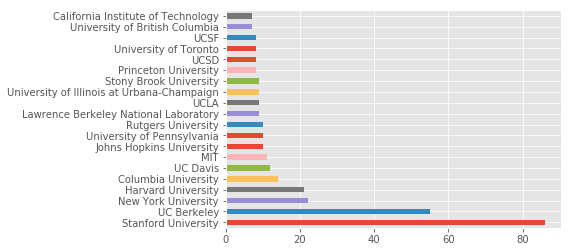

In [92]:
#Plot the top 20 schools where Fellows are from
f['Institution'].value_counts()[:20].plot(kind='barh')

How many unique companies have hired Insight Data Science Fellows?

In [80]:
len(company)
companyset = set(company)
len(companyset)

350

There are 350 unique companies that have hired Insight Data Science Fellows; 702 fellows were included in this dataset

Which companies have hired the most Data Science Fellows?

In [81]:
collections.Counter(f.Company).most_common(10)

[(None, 59),
 ('Facebook', 52),
 ('LinkedIn', 20),
 ('Stitch Fix', 19),
 ('Netflix', 14),
 ('Insight Data Science', 13),
 ('Intuit', 13),
 ('Gartner', 12),
 ('Yelp', 11),
 ('Capital One', 9)]

Top five companies that have hired Insight Data Science Fellows

Facebook: 52

LinkedIn: 20

Stitch Fix: 19

Netflix: 14

Insight Data Science: 13

Intuit: 13

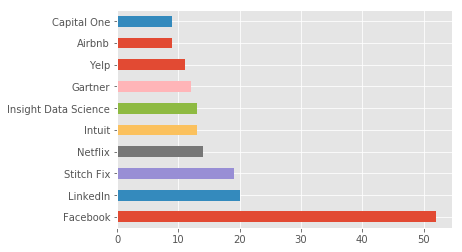

In [93]:
f['Company'].value_counts()[:10].plot(kind='barh')

Which fellows were hired by Insight Data Science?

In [94]:
f[f.Company == 'Insight Data Science']

,Company,Title,Background,Project,Field,Institution,Degree,3,4
77,Insight Data Science,Director of Product,"Computational Protein Engineering, California ...",DailyFaces: The people in today's news.,Computational Protein Engineering,California Institute of Technology,PhD,None,None
146,Insight Data Science,Director of Product,"Ecology & Evolution, The University of Texas a...",Neutral_Opinion: Visualizing opinions on net n...,Ecology & Evolution,The University of Texas at Austin,Postdoc,None,None
217,Insight Data Science,Director of Product,"Bioinformatics, Mount Sinai School of Medicine...",Airbnb Local: Chrome extension to recommend ni...,Bioinformatics,Mount Sinai School of Medicine,PhD,None,None
332,Insight Data Science,Artificial Intelligence Lead,"Cognitive Science, UCSD, PhD",Zidisha: Predicting microloan defaults & estim...,Cognitive Science,UCSD,PhD,None,None
384,Insight Data Science,Program Director & Data Scientist,"Computational Biology, UC Davis, Postdoc",kittyTwin: Find a feline friend that looks jus...,Computational Biology,UC Davis,Postdoc,None,None
416,Insight Data Science,Program Director & Data Scientist,"Biomedical Engineering, Johns Hopkins Universi...",One Signal: Optimizing Notification Timing,Biomedical Engineering,Johns Hopkins University,PhD,None,None
420,Insight Data Science,Artificial Intelligence Lead,"Astronomy, New York University, Postdoc",Count ‘em Up: Traffic estimation for PiinPoint.,Astronomy,New York University,Postdoc,None,None
470,Insight Data Science,Program Director & Data Scientist,"Neuroscience, University of Wisconsin-Madison,...",BackerKit: Identifying indicators of user conv...,Neuroscience,University of Wisconsin-Madison,PhD,None,None
471,Insight Data Science,Program Director & Data Scientist,"Engineering, UC San Diego, PhD",Insights for All: Providing data-driven insigh...,Engineering,UC San Diego,PhD,None,None
492,Insight Data Science,Program Director & Data Scientist,"Astrophysics, Johns Hopkins University, Postdoc",Truebill: Subscribe Better,Astrophysics,Johns Hopkins University,Postdoc,None,None


Under what titles are Fellows hired?

In [95]:
f.Title = f['Title'].str.strip()
collections.Counter(f.Title).most_common(10)

[('Data Scientist', 400),
 (None, 60),
 ('Senior Data Scientist', 42),
 ('Software Engineer', 11),
 ('Data Engineer', 8),
 ('Sr. Data Scientist', 8),
 ('Lead Data Scientist', 8),
 ('Business Associate', 7),
 ('Program Director & Data Scientist', 7),
 ('Data Science Consultant', 6)]

In [84]:
f.Field = f['Field'].str.strip()
collections.Counter(f.Field).most_common(10)

[('Physics', 79),
 ('Astrophysics', 49),
 ('Neuroscience', 32),
 ('Mathematics', 25),
 ('Cognitive Neuroscience', 19),
 ('Particle Physics', 16),
 ('Computational Biology', 14),
 ('Experimental Particle Physics', 14),
 ('Biomedical Engineering', 14),
 ('Electrical Engineering', 13)]

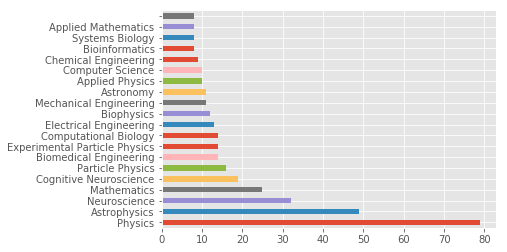

In [96]:
f['Field'].value_counts()[:20].plot(kind='barh')

In [97]:
f.Project[:10]

0             CouchTube: YouTube TV shows in one click
1                               Flight Delay Predictor
2      Email Searcher: Search & Visualize Your Mailbox
3             Sentiment Analysis Based on Social Media
4    Measuring the Impact of Open Source Coders on ...
5        Email Contacts Automatically Grouped & Ranked
6    Tweet Timeline: Visualizing the Impact of Soci...
7             Analysis of New York Stop-and-Frisk Data
8                          Stock Volatility Predictor 
9                    Find the Expert on Stack Overflow
Name: Project, dtype: object

In [98]:
#Export structured dataset to Excel file
f.to_excel('C:/Users/sugac_000/Desktop/Python SQL/Insight Data Project/InsightDataSci_updated.xlsx', sheet_name='Data')